In [4]:
library(ggplot2)
library(data.table)
library(cowplot)
library(jcolors)
setwd('/data6/Angelo/alexcc/AngeloStrainsPaper/manuscript_materials/soil_popgen')

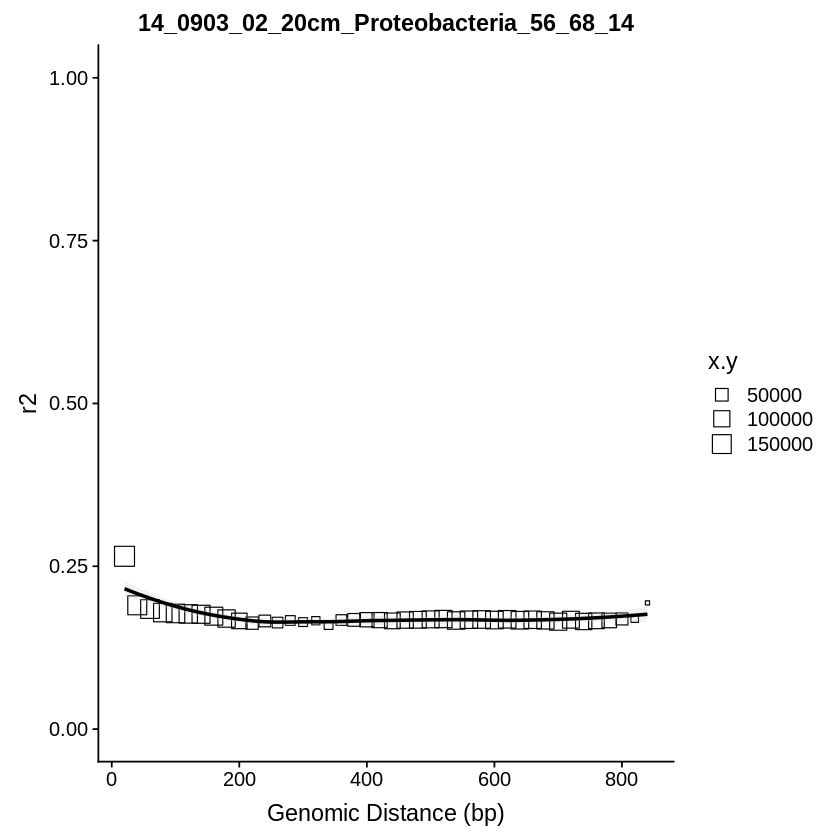

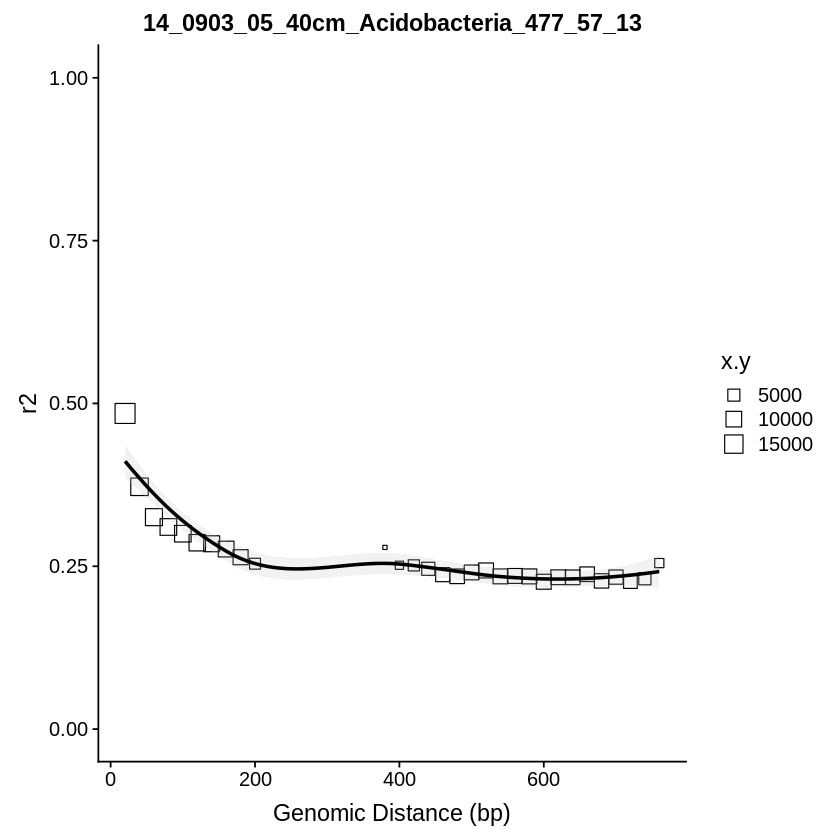

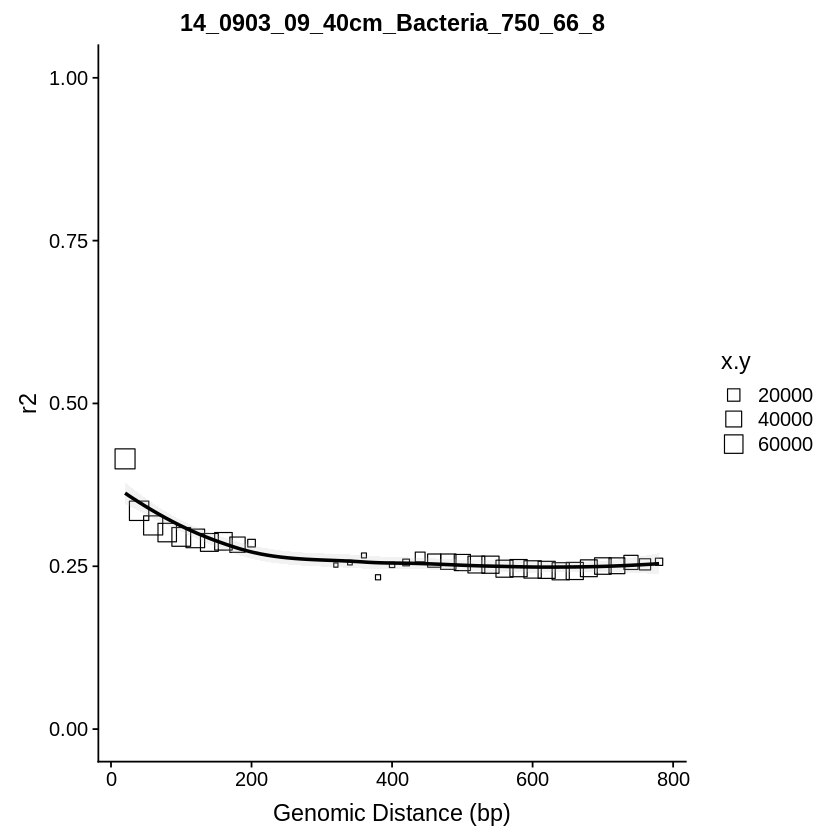

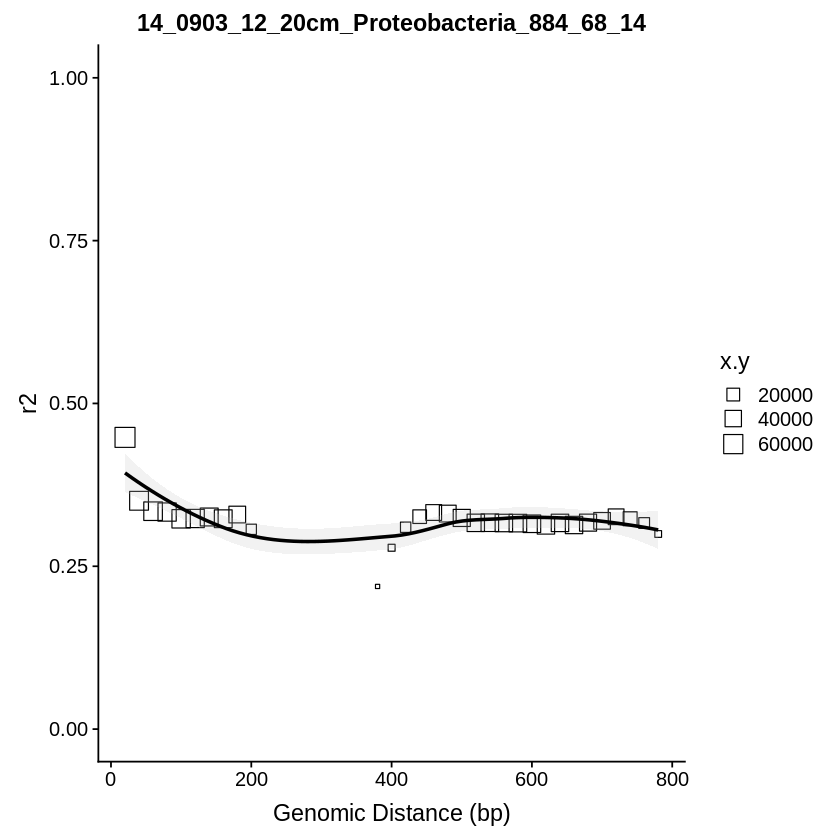

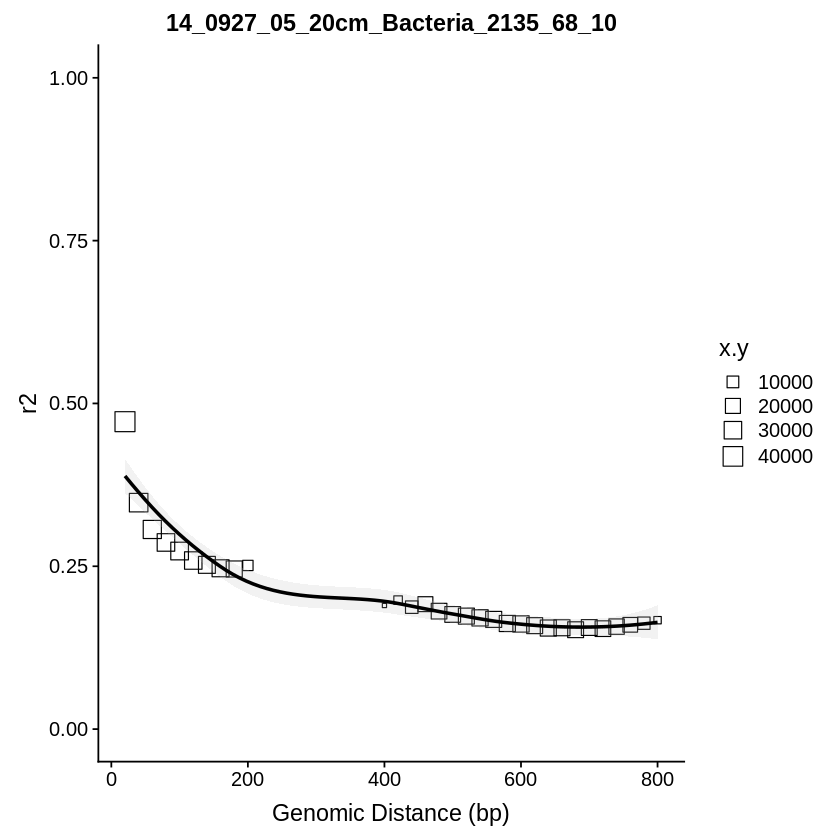

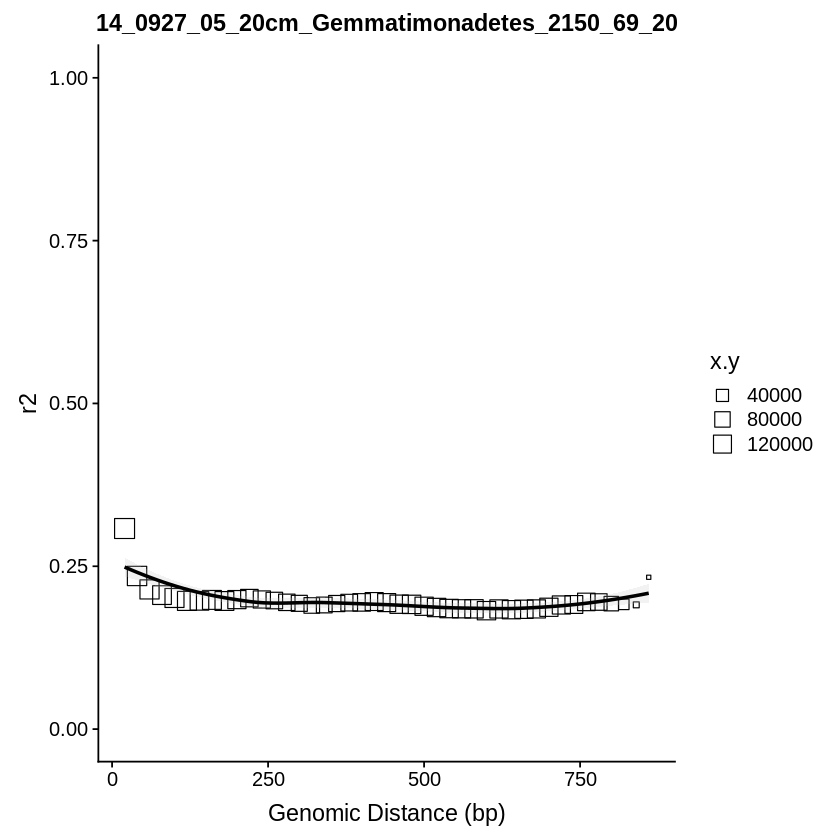

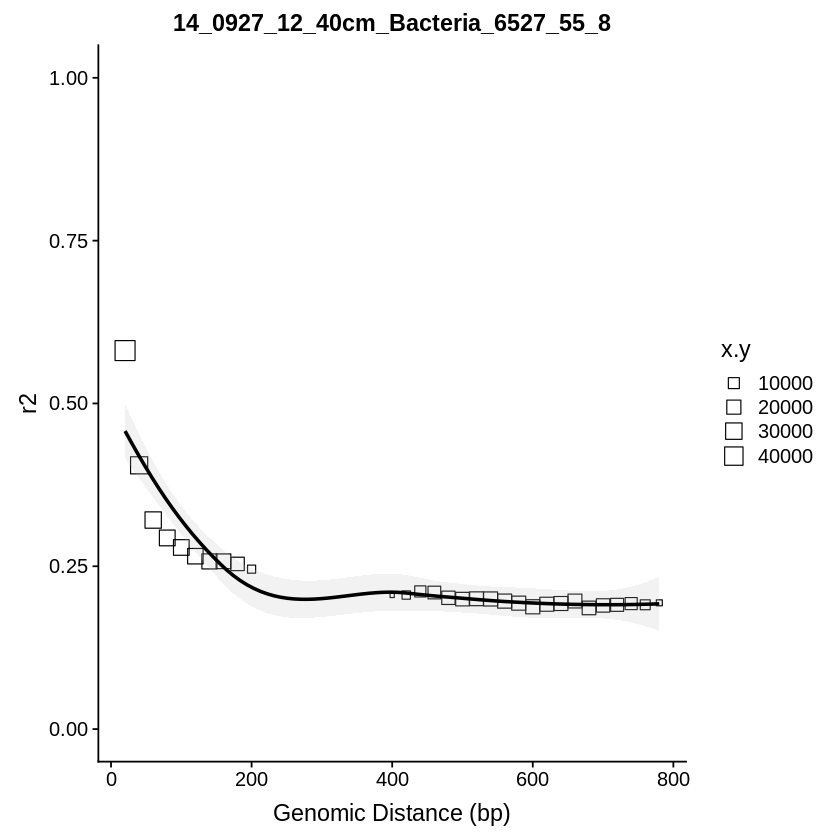

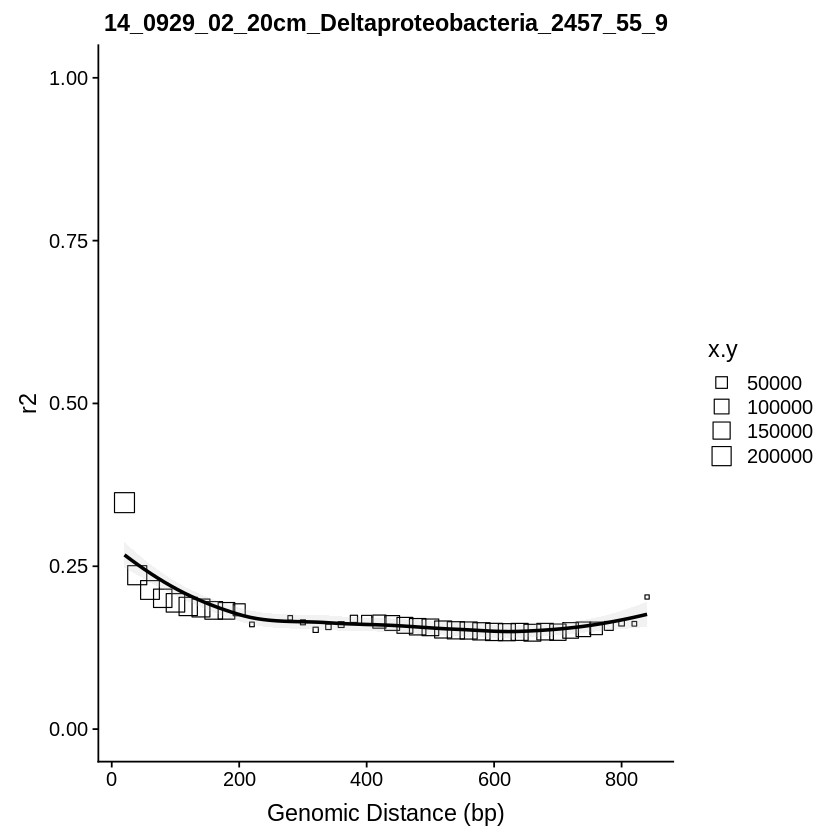

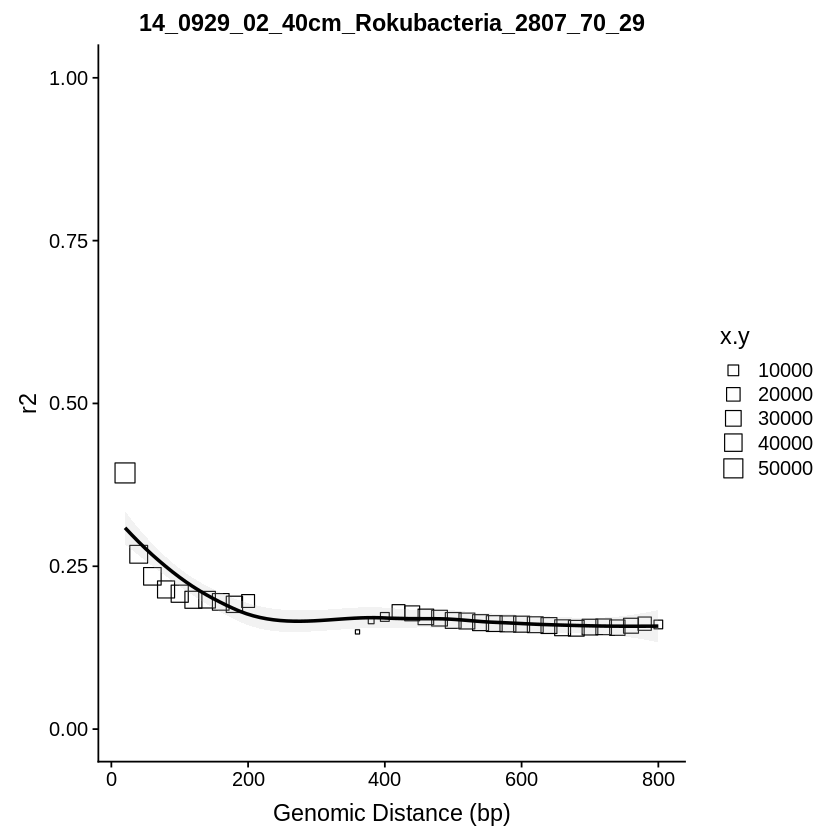

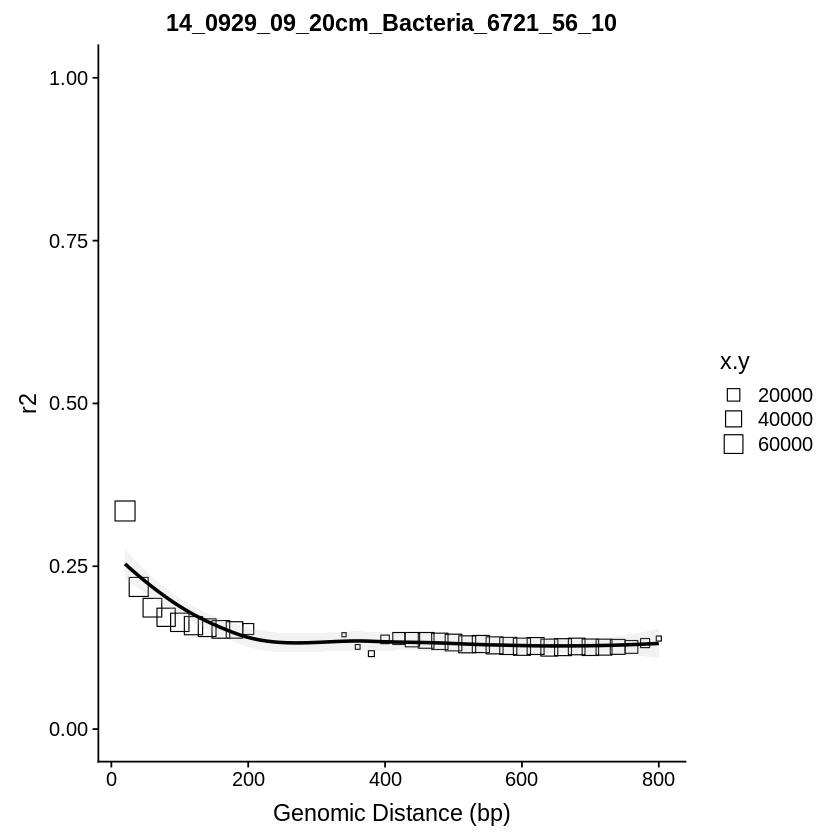

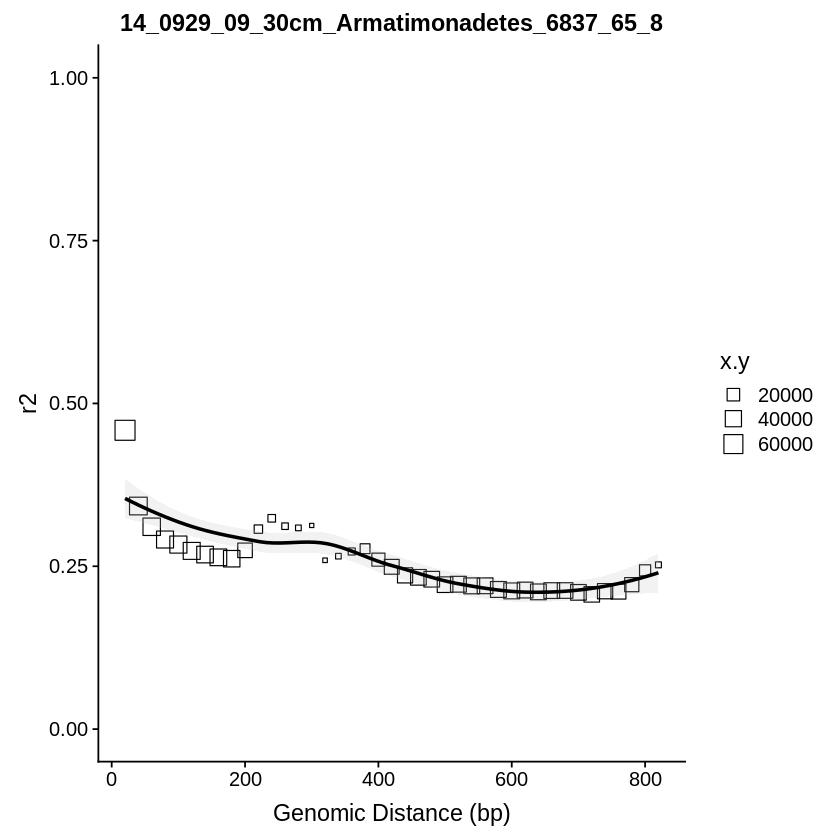

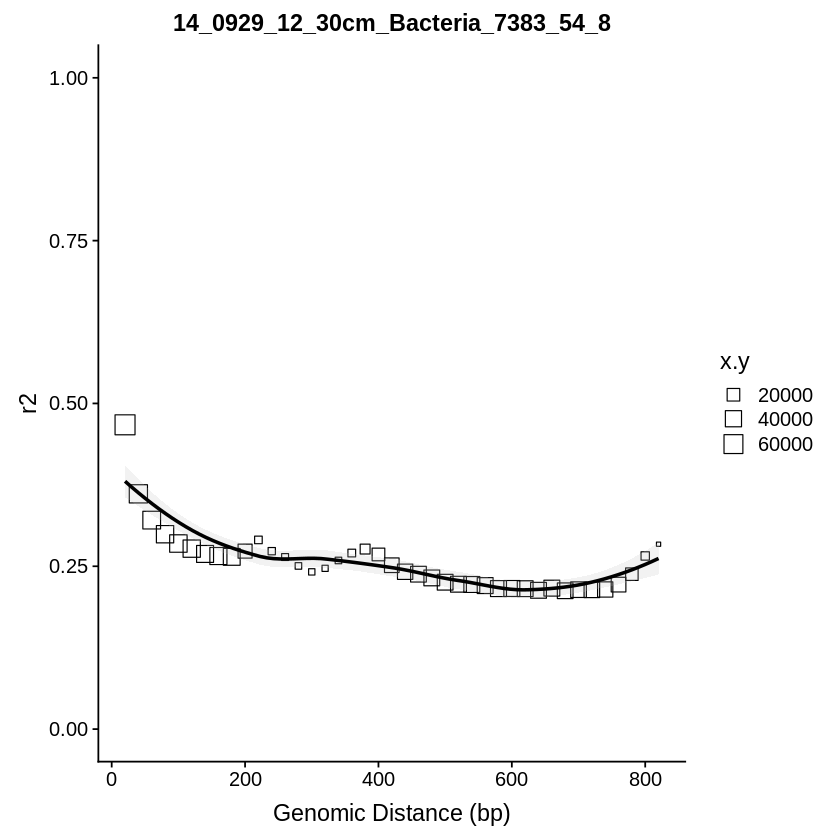

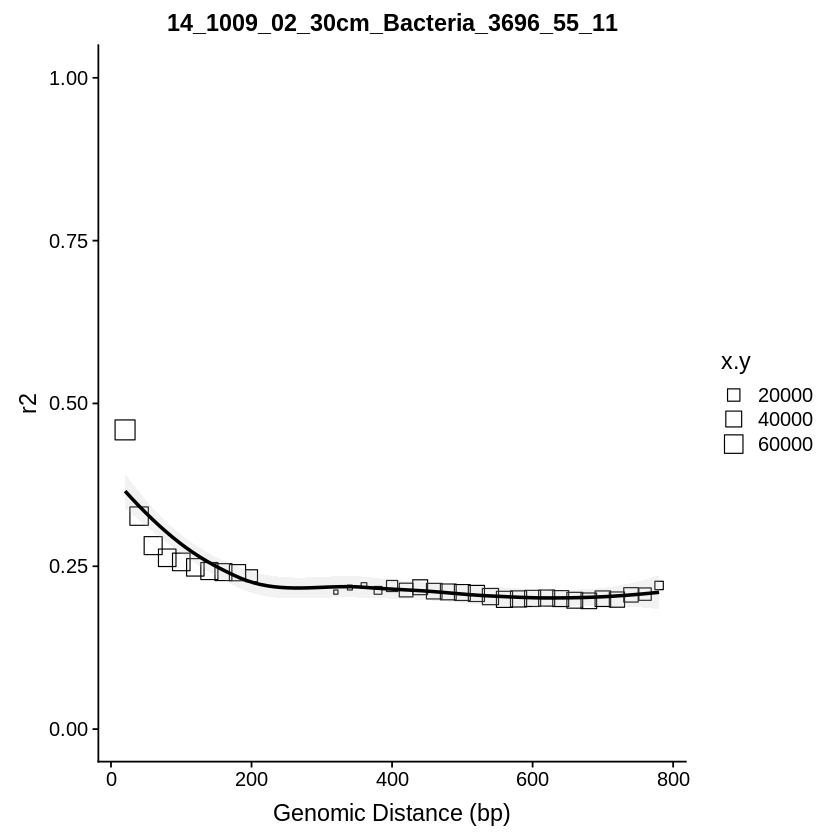

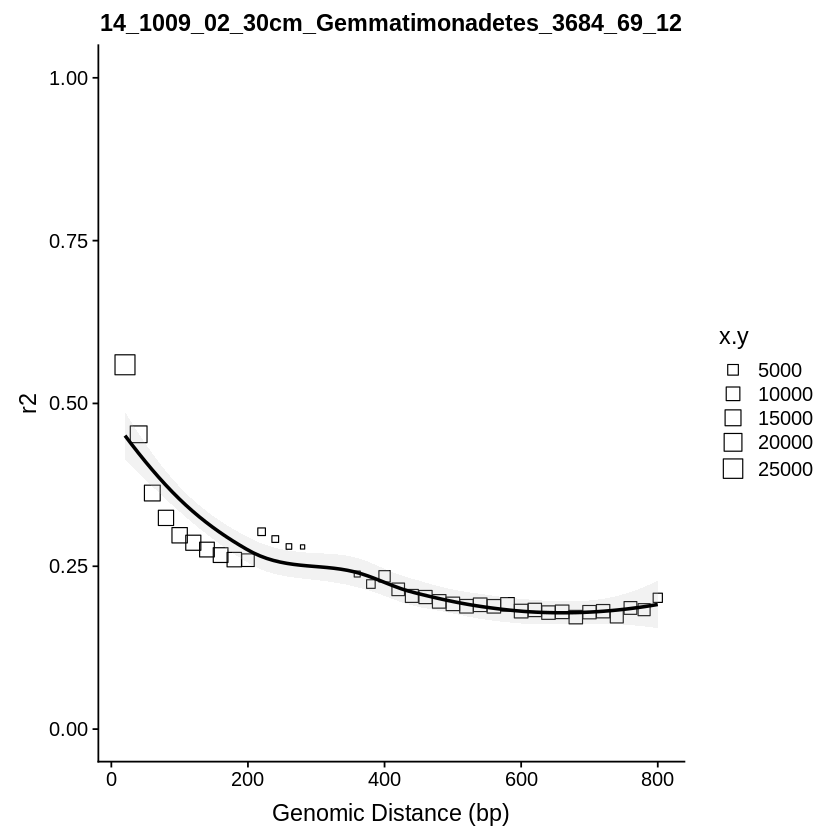

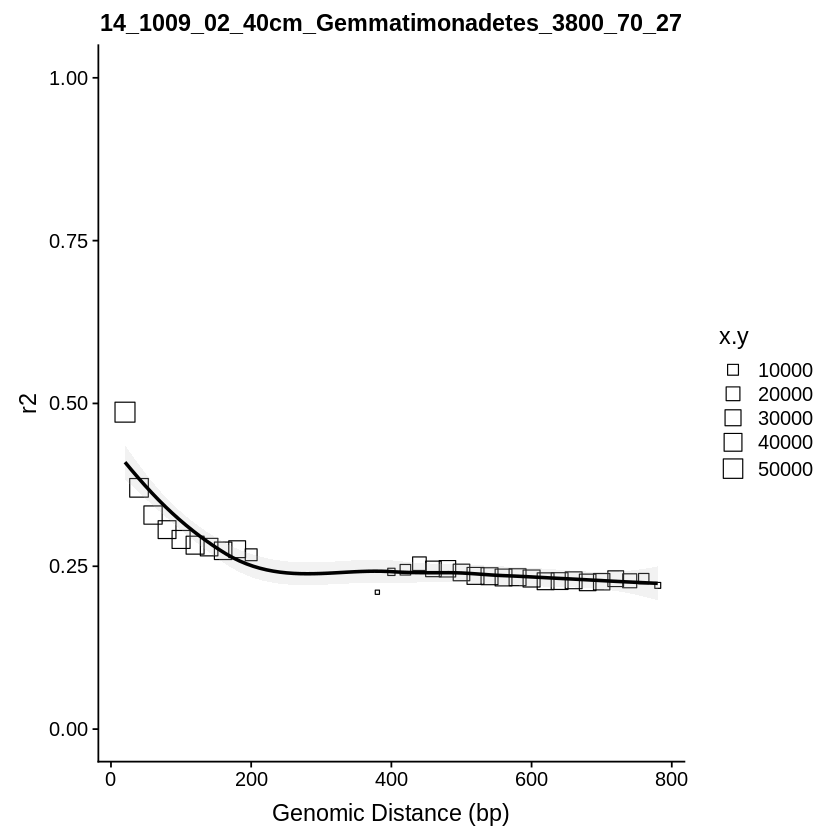

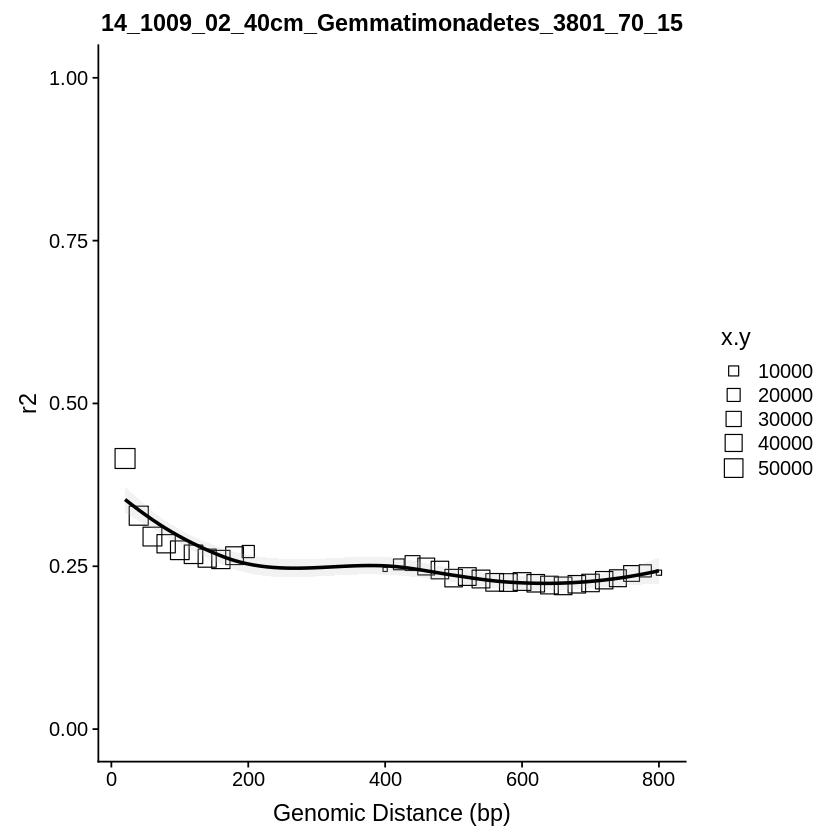

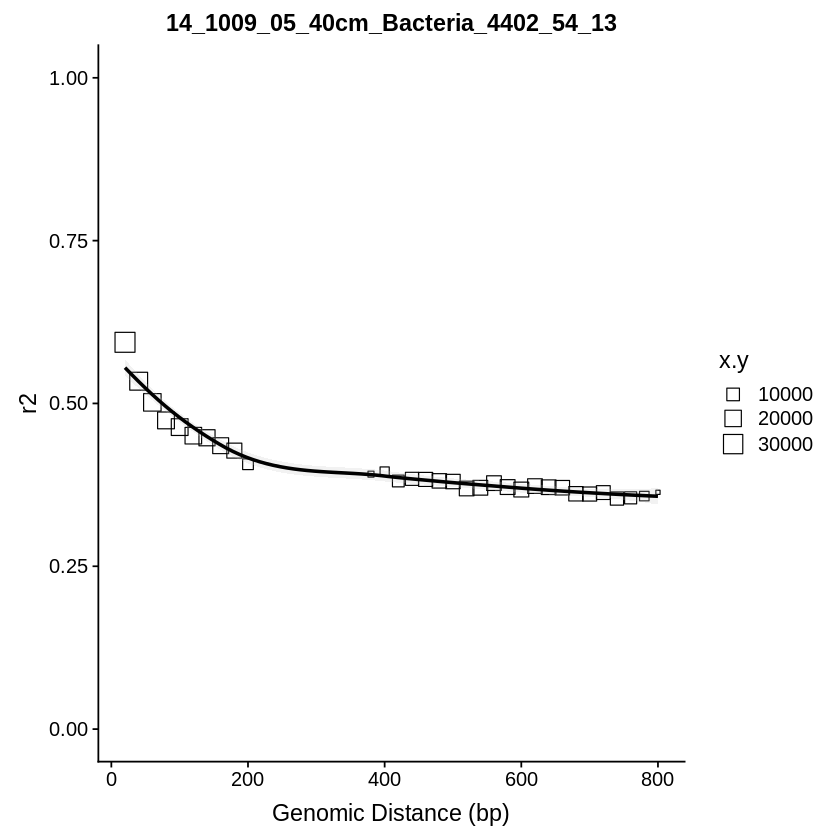

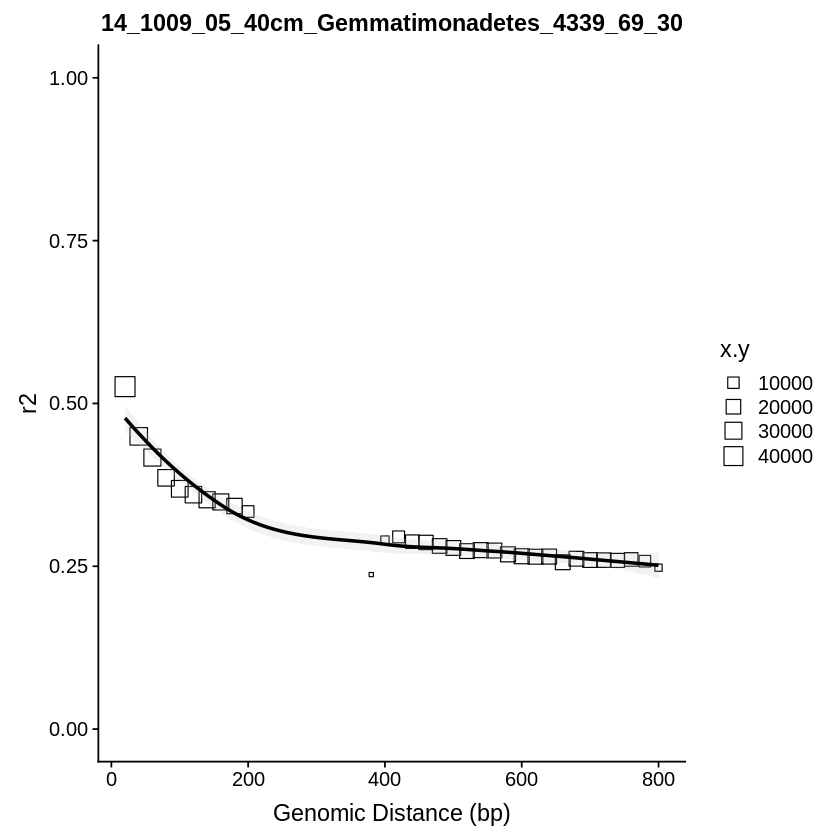

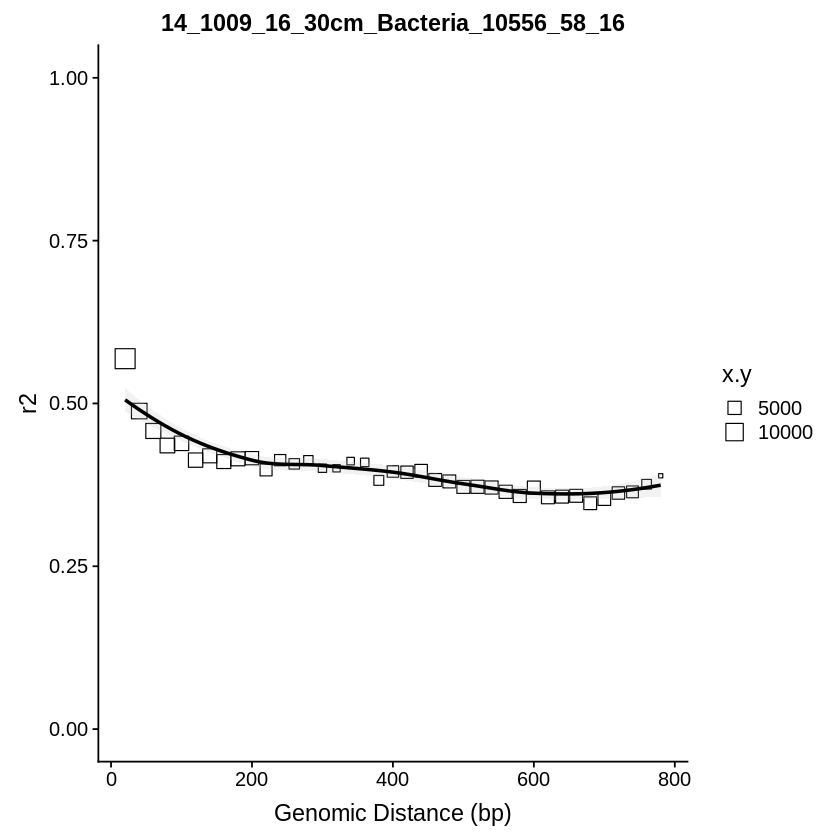

In [23]:
files = Sys.glob("./data/all/linkage/*.tsv")


for (f in files){

    d = fread(f, sep="\t")

    breaks <- seq(0,max(d$distance),20)

    by_mean <- aggregate(d$r2_normalized, FUN=mean,
                    by=list(distance=cut(d$distance, breaks, include.lowest=T)), na.rm=TRUE)
    by_length <- aggregate(d$r2_normalized, FUN=length,
                    by=list(distance=cut(d$distance, breaks, include.lowest=T)))
    linkage <- merge(by_mean, by_length, by = "distance")
    linkage = linkage[order(linkage$distance),]
    linkage$count = seq(1:nrow(linkage))

    linkage = linkage[which(linkage$x.y > 500),]
    distances = list()
    for (dist in unlist(strsplit(as.character(linkage$distance), split=' '))){
        dist2 = gsub(strsplit(dist, split = ',')[[1]][2], pattern='\\]', replacement='')
        distances = c(distances, as.numeric(dist2))
    }
    linkage$Distance = as.numeric(distances)
    
    
    
    p <- ggplot(data=linkage, aes(x=Distance, y=x.x)) + 
    geom_point(aes(size=x.y), shape=22) + 
    scale_color_jcolors(palette = "pal5") +
    geom_smooth(alpha=0.2, fill='grey', , color='black', method='loess') +
    ggtitle(genome) + 
    xlab("Genomic Distance (bp)") + ylab("r2") + ylim(0,1)
    print(p)
}
